### 변형(TRANSFORM)
데이터가 항상 머신러닝 알고리즘 학습에 필요한 최종 처리가 된 형태로 제공되지는 않습니다. 변형(transform) 을 해서 데이터를 조작하고 학습에 적합하게 만듭니다.

모든 TorchVision 데이터셋들은 변형 로직을 갖는, 호출 가능한 객체(callable)를 받는 매개변수 두개 ( 특징(feature)을 변경하기 위한 transform 과 정답(label)을 변경하기 위한 target_transform )를 갖습니다 torchvision.transforms 모듈은 주로 사용하는 몇가지 변형(transform)을 제공합니다.

FashionMNIST 특징(feature)은 PIL Image 형식이며, 정답(label)은 정수(integer)입니다. 학습을 하려면 정규화(normalize)된 텐서 형태의 특징(feature)과 원-핫(one-hot)으로 부호화(encode)된 텐서 형태의 정답(label)이 필요합니다. 이러한 변형(transformation)을 하기 위해 ToTensor 와 Lambda 를 사용합니다.

In [99]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda,Resize
from torchvision import transforms

In [2]:
ds = datasets.FashionMNIST(
    root="data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

 위의 코드는 PyTorch의 torchvision 라이브러리를 사용하여 FashionMNIST 데이터셋을 로드하는 예제입니다. 여기에서 transform과 target_transform은 데이터셋의 변환을 정의하는 데 사용되는 두 가지 중요한 매개변수입니다.
```
1. transform:

- transform 매개변수는 데이터셋의 이미지 데이터에 대한 변환을 정의합니다.
- 위의 코드에서 transform=ToTensor()를 사용하여 이미지를 PyTorch 텐서로 변환합니다. 이는 이미지 데이터를 넘파이 배열에서 PyTorch 텐서로 변환하는 작업을 수행합니다.
이렇게 변환된 이미지는 신경망 모델에 입력으로 제공될 수 있게 됩니다.

2. target_transform:

- target_transform 매개변수는 데이터셋의 레이블 또는 타겟 데이터에 대한 변환을 정의합니다.
위의 코드에서 target_transform은 람다(lambda) 함수를 사용하여 레이블을 원-핫 인코딩(one-hot encoding)으로 변환합니다. 이 변환은 타겟(레이블) 데이터를 다른 형식으로 표현하는 데 사용됩니다.

- 예를 들어, FashionMNIST 데이터셋에서 각 이미지의 레이블은 0부터 9까지의 정수로 표현되는데, 이를 원-핫 인코딩으로 변환하면 각 레이블이 10차원 벡터로 표현됩니다. 선택한 클래스에 해당하는 위치는 1로 표시되고, 나머지 위치는 0으로 표시됩니다.

- 이렇게 transform과 target_transform을 사용하면 데이터셋에서 가져온 이미지와 레이블을 신경망 모델에 맞게 변환할 수 있으며, 모델 훈련을 위한 데이터 전처리를 간편하게 수행할 수 있습니다.
```

### Lambda 변형(Transform)

Lambda 변형은 사용자 정의 람다(lambda) 함수를 적용합니다. 여기에서는 정수를 원-핫으로 부호화된 텐서로 바꾸는 함수를 정의합니다. 이 함수는 먼저 (데이터셋 정답의 개수인) 크기 10짜리 영 텐서(zero tensor)를 만들고, scatter_ 를 호출하여 주어진 정답 y 에 해당하는 인덱스에 value=1 을 할당합니다.

In [16]:
# target_transofrm 에서 행해진 lambda 에 대해 알아보자

zero_tensor = torch.zeros(10, dtype = torch.float)
print(zero_tensor)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [12]:
y = 3 # 만약 label 값이 10개의 class 중 3번째 class 라면

tensor_y = torch.tensor(y)

print(tensor_y)

tensor(3)


In [15]:
scattered_zero_tensor = zero_tensor.scatter_(0,tensor_y, value = 1)
print(scattered_zero_tensor)

tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])


target_transform에 행해진 lambda 는 정수형으로 이뤄진 label 값을 10 개의 class 들이 담긴

10차원의 zero vector 를 생성하고 y 의 정수형에 해당하는 값을 1로 만들어주는 , 원핫인코딩 방식이구나

### ToTensor()

ToTensor 는 PIL Image나 NumPy ndarray 를 FloatTensor 로 변환하고, 이미지의 픽셀의 크기(intensity) 값을 [0., 1.] 범위로 비례하여 조정(scale)합니다.

In [37]:
from PIL import Image
import numpy as np

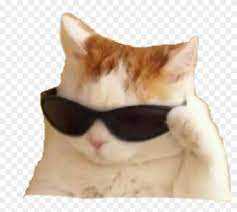

In [38]:
file_path = "C:/Users/whileduck/Desktop/images.jpg"

image = Image.open(file_path)
image # 이미지를 불러오자 

In [39]:
numpy_image = np.array(image)

print(numpy_image.shape)
print(numpy_image) # numpy 에 저장된 iamge 는 212, 237의 이미지의 3채널값이다.

(212, 237, 3)
[[[251 251 251]
  [252 252 252]
  [252 252 252]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]

 [[251 251 251]
  [253 253 253]
  [255 255 255]
  ...
  [239 239 239]
  [239 239 239]
  [239 239 239]]

 [[252 252 252]
  [255 255 255]
  [255 255 255]
  ...
  [235 235 235]
  [235 235 235]
  [235 235 235]]

 ...

 [[239 239 239]
  [238 238 238]
  [237 237 237]
  ...
  [249 249 249]
  [249 249 249]
  [249 249 249]]

 [[239 239 239]
  [238 238 238]
  [237 237 237]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[239 239 239]
  [238 238 238]
  [237 237 237]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [47]:
to_tensor = ToTensor() # To tensor 를 사용하게 되면 ndarray 형태의 이미지가 정규화 되어 텐서 형태로 저장
tensor_image = to_tensor(numpy_image)

print(tensor_image.shape)
print(tensor_image)

torch.Size([3, 212, 237])
tensor([[[0.9843, 0.9882, 0.9882,  ..., 0.9490, 0.9490, 0.9490],
         [0.9843, 0.9922, 1.0000,  ..., 0.9373, 0.9373, 0.9373],
         [0.9882, 1.0000, 1.0000,  ..., 0.9216, 0.9216, 0.9216],
         ...,
         [0.9373, 0.9333, 0.9294,  ..., 0.9765, 0.9765, 0.9765],
         [0.9373, 0.9333, 0.9294,  ..., 0.9922, 0.9922, 0.9922],
         [0.9373, 0.9333, 0.9294,  ..., 1.0000, 1.0000, 1.0000]],

        [[0.9843, 0.9882, 0.9882,  ..., 0.9490, 0.9490, 0.9490],
         [0.9843, 0.9922, 1.0000,  ..., 0.9373, 0.9373, 0.9373],
         [0.9882, 1.0000, 1.0000,  ..., 0.9216, 0.9216, 0.9216],
         ...,
         [0.9373, 0.9333, 0.9294,  ..., 0.9765, 0.9765, 0.9765],
         [0.9373, 0.9333, 0.9294,  ..., 0.9922, 0.9922, 0.9922],
         [0.9373, 0.9333, 0.9294,  ..., 1.0000, 1.0000, 1.0000]],

        [[0.9843, 0.9882, 0.9882,  ..., 0.9490, 0.9490, 0.9490],
         [0.9843, 0.9922, 1.0000,  ..., 0.9373, 0.9373, 0.9373],
         [0.9882, 1.0000, 1.0000

```
transforms.ToTensor() 변환은 이미지를 0과 1 사이의 값으로 정규화하기 위해 각 RGB 채널의 최댓값(255)으로 나누어 줍니다. 이는 이미지의 각 픽셀 값을 [0, 255] 범위에서 [0, 1] 범위로 스케일을 조정하는 데 사용됩니다. 따라서 변환된 이미지의 각 픽셀 값은 0과 1 사이의 실수 값이 됩니다.

이렇게 정규화를 수행하는 이유는 다음과 같습니다:

학습을 더 쉽게 만듭니다: 신경망 모델은 입력 데이터의 범위가 작을수록 더 빠르고 안정적으로 학습할 수 있습니다.

수치 안정성을 향상시킵니다: 실수 값이 0과 1 사이에 있을 때 수치 안정성이 향상되어 오버플로우나 언더플로우 문제를 예방할 수 있습니다.

다양한 모델에 적용 가능합니다: 이미지 데이터의 정규화는 다양한 딥러닝 모델에 일반적으로 적용되므로, 표준적인 전처리 단계로 자주 사용됩니다.

따라서 이미지를 PyTorch 텐서로 변환할 때 transforms.ToTensor()를 사용하면 이러한 정규화 작업이 자동으로 수행됩니다.
```

In [72]:
# To tensor 가 작동되는 것과 같은 원리

max_ch_0 = np.max(numpy_image[:,:,0])
max_ch_1 = np.max(numpy_image[:,:,1])
max_ch_2 = np.max(numpy_image[:,:,2])

print("최대값 (빨간 채널):", max_ch_0)
print("최대값 (초록 채널):", max_ch_1)
print("최대값 (파란 채널):", max_ch_2)

최대값 (빨간 채널): 255
최대값 (초록 채널): 255
최대값 (파란 채널): 255


In [84]:
numpy_image = numpy_image.astype(float) # 연산이 가능하게 float type 으로 변경

numpy_image[:,:,0] /= max_ch_0
numpy_image[:,:,1] /= max_ch_1
numpy_image[:,:,2] /= max_ch_2

In [87]:
numpy_image

array([[[0.98431373, 0.98431373, 0.98431373],
        [0.98823529, 0.98823529, 0.98823529],
        [0.98823529, 0.98823529, 0.98823529],
        ...,
        [0.94901961, 0.94901961, 0.94901961],
        [0.94901961, 0.94901961, 0.94901961],
        [0.94901961, 0.94901961, 0.94901961]],

       [[0.98431373, 0.98431373, 0.98431373],
        [0.99215686, 0.99215686, 0.99215686],
        [1.        , 1.        , 1.        ],
        ...,
        [0.9372549 , 0.9372549 , 0.9372549 ],
        [0.9372549 , 0.9372549 , 0.9372549 ],
        [0.9372549 , 0.9372549 , 0.9372549 ]],

       [[0.98823529, 0.98823529, 0.98823529],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863]],

       ...,

       [[0.9372549 , 0.9372549 , 0.9372549 ],
        [0.93333333, 0.93333333, 0.93333333],
        [0.92941176, 0

In [90]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'normalized numpy image')

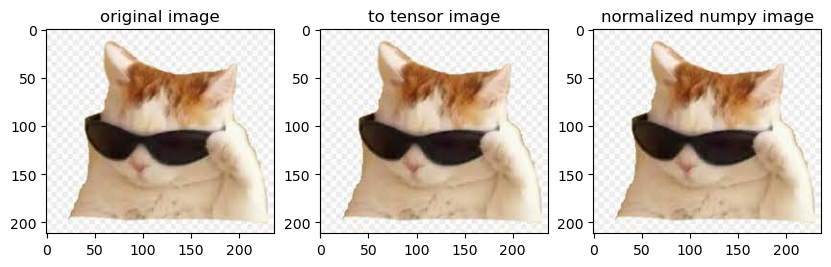

In [96]:
fig,ax = plt.subplots(figsize = (10,5), ncols = 3)

ax[0].imshow(image)
ax[1].imshow(tensor_image.permute(1,2,0))
ax[2].imshow(numpy_image)

ax[0].set_title('original image')
ax[1].set_title('to tensor image')
ax[2].set_title('normalized numpy image')

# **transform 의 다양한 기능**

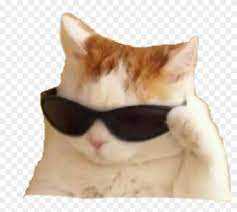

In [102]:
image # 원본데이터

In [115]:
# 이미지 크기 조정 및 정규화
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # 이미지 크기 조정
    transforms.ToTensor(),  # 텐서로 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 정규화
])

# 현재 사용된 mean 은 imagae net 이미지들의 RGB 채널의 평균과 표준편차 

# 전처리를 위한 pipeline 형태 생성

In [116]:
# 1. 데이터를 resize 
# 2. Totensor 형태로 정규화 (0과 1 사이의 값에 있도록) 
# 3. 각 RGB 채널의 평균과 표준편차를 이용해서 정규화  

preprocessed_image = preprocess(image) # 파이프라인을 건너서 image preprocessing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

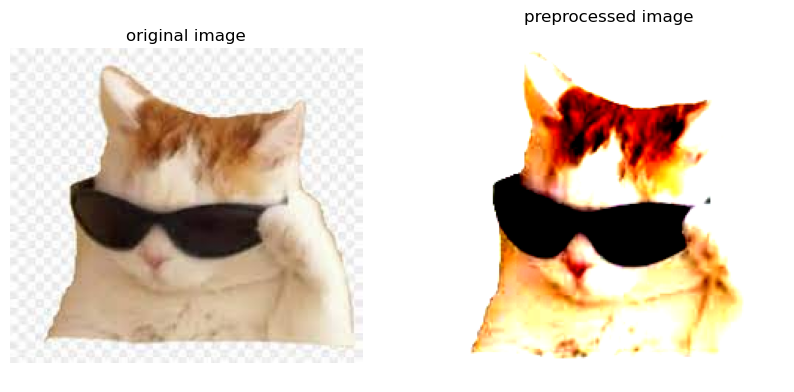

In [117]:
fig,ax = plt.subplots(figsize = (10,5), ncols = 2)

ax[0].imshow(image)
ax[1].imshow(preprocessed_image.permute([1,2,0]))

ax[0].set_title('original image')
ax[1].set_title('preprocessed image')

ax[0].axis('off')
ax[1].axis('off')

```
이미지 데이터를 0과 1 사이의 값으로 정규화한 후, 표준화(standardization)를 수행하는 것은 이미지 데이터의 분포를 보다 잘 다룰 수 있게 도와주는데 다음과 같은 장점을 가집니다:

1. 표준화는 평균을 중심으로 데이터 분포 조정: 이미지 데이터를 0과 1 사이의 값으로 정규화하면 데이터는 일반적으로 0.5 주변에 위치합니다. 이것은 데이터 분포를 평균적으로 중심으로 조정하는 것입니다. 하지만 표준화는 데이터의 평균을 0으로 만들고 데이터 분포를 평균을 중심으로 조절합니다. 이렇게 하면 모델이 데이터의 중심을 더 쉽게 파악할 수 있습니다.

2. 표준화는 데이터 분산을 조절: 표준화는 데이터의 분산을 1로 만듭니다. 이것은 데이터의 스케일을 조절하는 데 도움이 되며, 모델이 특성 간의 중요성을 더 잘 이해할 수 있도록 돕습니다.

3. 수치 안정성 향상: 표준화는 데이터를 작은 범위 내에서 조절하기 때문에 수치 안정성을 향상시킵니다. 이로 인해 수치 계산에서 발생할 수 있는 오버플로우나 언더플로우 문제를 완화할 수 있습니다.

4. 모델 학습의 안정성 향상: 표준화된 데이터를 사용하면 모델의 학습이 안정적으로 수렴하는 데 도움을 줄 수 있습니다. 경사하강 알고리즘이 빠르고 안정적으로 수행될 가능성이 높아집니다.

5. 일관된 성능 향상: 모델이 다양한 데이터셋에서 일관된 성능을 발휘할 수 있도록 도와줍니다. 표준화된 데이터는 특정 데이터셋에 종속되지 않고 다양한 데이터셋에서 더 일관된 성능을 나타낼 수 있습니다.

따라서 이미지 데이터를 0과 1 사이의 값으로 정규화한 후 표준화하는 것은 데이터의 분포를 조절하고 모델 학습과 일반화를 향상시키는 데 도움이 됩니다. 이러한 전처리는 딥러닝 모델의 성능 향상과 안정성을 향상시키는 중요한 단계 중 하나입니다.
```